In [1]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,Flatten

In [2]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [3]:
X_test.shape

(10000, 28, 28)

In [4]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

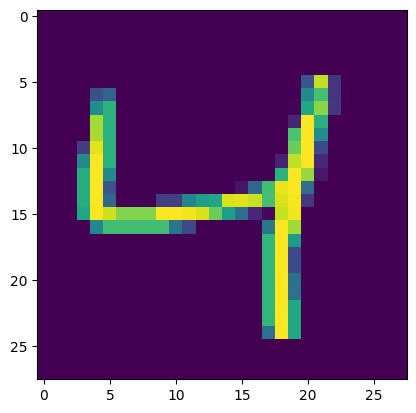

In [5]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [9]:
model = Sequential()

In [10]:
model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 32)                4128      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [13]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25


1500/1500 [==============================] - 13s 6ms/step - loss: 0.2871 - accuracy: 0.9154 - val_loss: 0.1523 - val_accuracy: 0.9571
Epoch 2/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.1196 - accuracy: 0.9647 - val_loss: 0.1245 - val_accuracy: 0.9612
Epoch 3/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0793 - accuracy: 0.9759 - val_loss: 0.1208 - val_accuracy: 0.9660
Epoch 4/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0600 - accuracy: 0.9813 - val_loss: 0.0984 - val_accuracy: 0.9713
Epoch 5/25
1500/1500 [==============================] - 9s 6ms/step - loss: 0.0471 - accuracy: 0.9852 - val_loss: 0.0950 - val_accuracy: 0.9731
Epoch 6/25
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0371 - accuracy: 0.9881 - val_loss: 0.0978 - val_accuracy: 0.9728
Epoch 7/25
1500/1500 [==============================] - 8s 6ms/step - loss: 0.0303 - accuracy: 0.9901 - val_loss: 0.1047 - val_accura

In [15]:
y_pred = model.predict(X_test)
y_pred

313/313 [==============================] - 1s 3ms/step


array([[1.2977142e-16, 9.6985078e-09, 2.0353694e-09, ..., 1.0000000e+00,
        5.1702221e-19, 1.0854197e-11],
       [4.2009104e-18, 9.1757825e-12, 1.0000000e+00, ..., 2.2207230e-22,
        3.8381103e-19, 5.8548599e-32],
       [1.4118254e-10, 9.9999988e-01, 1.1535882e-08, ..., 1.9923319e-12,
        7.5091371e-08, 1.2456535e-18],
       ...,
       [3.9384750e-28, 1.7178801e-17, 3.5538902e-24, ..., 1.1323017e-15,
        3.1280132e-19, 1.3150422e-15],
       [2.1367811e-30, 1.3167395e-29, 2.4168422e-30, ..., 1.1401915e-28,
        7.7569888e-14, 4.0907482e-26],
       [1.3822457e-19, 6.8178395e-26, 1.9547705e-23, ..., 4.5892014e-35,
        3.6421016e-22, 1.4025071e-21]], dtype=float32)

In [23]:
y_pred[1]

2

In [16]:
y_pred = y_pred.argmax(axis=-1)

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9772

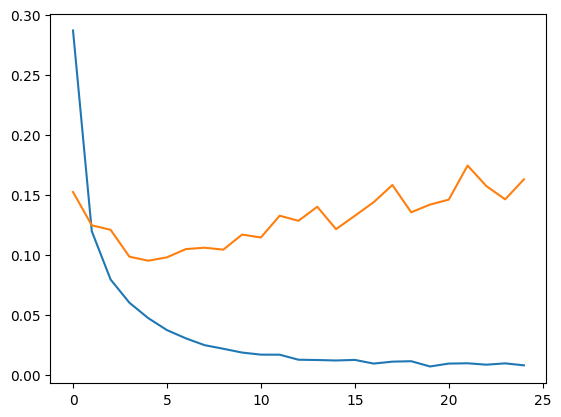

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

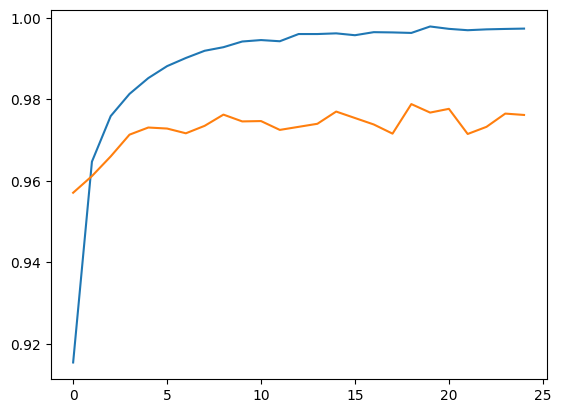

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

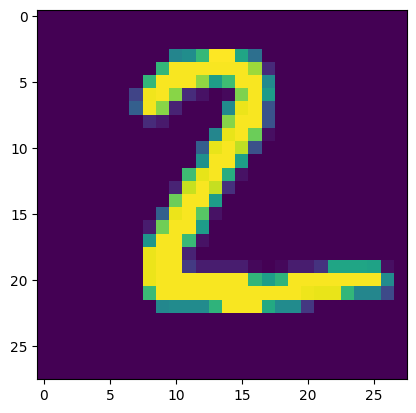

In [24]:
plt.imshow(X_test[1])

In [26]:
model.predict(X_test[1].reshape(1, 28, 28)).argmax(axis=1)

1/1 [==============================] - 0s 73ms/step


array([2], dtype=int64)